<a href="https://colab.research.google.com/github/rehanaanshad/c-programming/blob/main/FakeNewsDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import csv
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
pip install zeugma

In [ ]:
from zeugma.embeddings import EmbeddingTransformer


In [ ]:
file_path1 = '/content/TRAIN1.csv'
file_path2 = '/content/TRAIN5.csv'
file_path = '/content/TRAIN5.csv'

In [ ]:
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

output=df1.append(df2)
output.to_csv("output.csv", sep=',')

In [ ]:
file_path = '/content/drive/MyDrive/TRAIN5.csv'

In [ ]:
data_initial = open(file_path, "rb")
data = csv.reader((line.replace('\0','') for line in data_initial), delimiter=",")

NameError: ignored

In [ ]:
train_df1 = pd.read_csv(file_path)

In [ ]:
train_df = train_df1.dropna()

AxesSubplot(0.125,0.125;0.775x0.755)


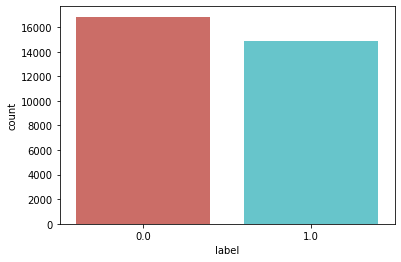

In [ ]:
def create_distribution(dataFile):
     print(sb.countplot(x='label', data=dataFile, palette='hls'))

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [ ]:
train_df['title'][119]

'Trump to Ask for Sharp Increases in Military Spending, Officials Say - The New York Times'

In [ ]:
lemmatizer = WordNetLemmatizer()
print(stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
for x in range(len(train_df)) :
    corpus = []
    review = None
    try:
      review = train_df['title'][x]
    except Exception:
      continue
    review = str(review)
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stopwords :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['title'][x] = review      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
label_train = train_df.label

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['title'], label_train, test_size=0.3, random_state=1)


In [ ]:
glove = EmbeddingTransformer('glove')

In [ ]:
glove_X_train = glove.fit_transform(X_train)
glove_X_test = glove.transform(X_test)

In [ ]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

In [ ]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(tfidf_X_train,Y_train)

SVC()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(tfidf_X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy: 80.42%
Confusion matrix, without normalization


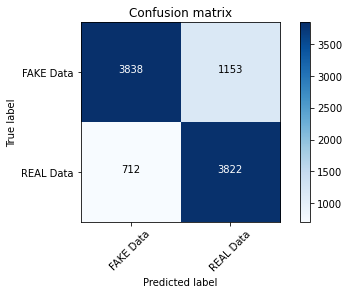

In [ ]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Accuracy: 59.28%
Confusion matrix, without normalization


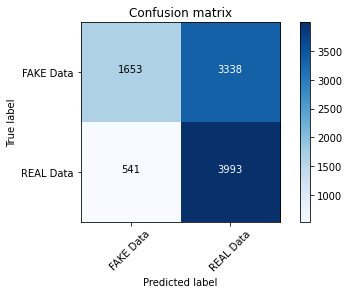

In [ ]:
Y_pred = classifier.predict(glove_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [ ]:
pickle.dump(classifier,open('./model.pkl', 'wb'))


In [ ]:
loaded_model = pickle.load(open('./model.pkl', 'rb'))


In [ ]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stopwords :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 1:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")

In [ ]:
fake_news_det("FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart")